## Lack of robustness of the Markowitz procedure (efficient frontier). GMW

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import edhec_risk_kit as erk
from scipy.optimize import minimize
import matplotlib.pyplot as plt

ind = erk.get_ind_returns()
er = erk.annualized_rets(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

Markowitz procedure is, in principle, a good method to build a portfolio. However, it is sensitive to errors in parameter estimates. As we can see below, a slight change in the estimation of expected returns provides a much different portfolio:

In [2]:
l = ["Food","Steel"]
real_er = er[l]
changed_er = er[l]
changed_er[0] = changed_er[0]-0.01 # new food er
changed_er[1] = changed_er[1] + 0.005 # new steel er

In [6]:
#Here I already use the updated efficient frontier function 

er_weights = erk.ef_complete(0.1,er[l],cov.loc[l,l],show_sr_df=True)
changed_er_weights = erk.ef_complete(0.1,changed_er,cov.loc[l,l],show_sr_df=True) #we change a bit the expected returns

print(er_weights,"\n",changed_er_weights)

(   Returns MSR  Volatility MSR  Maximized Sharpe Ratio      Food     Steel
0     0.116552        0.044114                0.375196  0.750404  0.249596, None, None) 
 (   Returns MSR  Volatility MSR  Maximized Sharpe Ratio      Food     Steel
0     0.114225        0.051409                0.276705  0.469911  0.530089, None, None)


For this reason, professional usually focus on two other different portfolios that do not depend on the expected returns. One of things that can be done is using the **Global Minimum Variance (GMV) portfolio** , which is the portfolio where the expected returns for all the assets are assumed to be the same (number does not matter), i.e. the left-most point in the efficient frontier, as this assumptions returns the portfolio with the least volatility of the efficient frontier. The other option is the **Equal Weight portfolio**, which is a portfolio in which each asset has the same assigned weight. Of course, this is a very naive approach, but it might do the trick. Finding these portfolios is pretty easy, and we can do it with the following function (please, read the documentation for explanation).

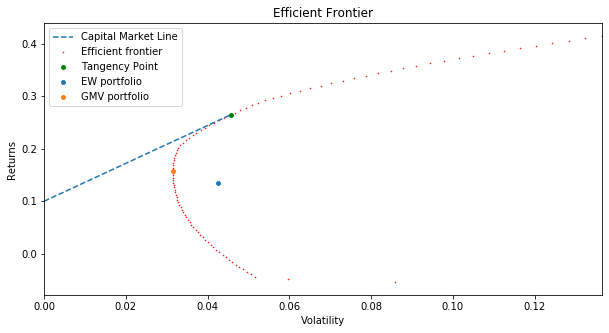

In [21]:
a,b,c= erk.ef_complete(0.10,er,cov,n_points=100, show_sr_df=True,show_ew_df=True,show_gmv_df=True,plot_ef=True,plot_sr=True,plot_ew=True,plot_gmv=True)

In [22]:
c

,Returns GMV,Volatility GMV,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
0,0.158297,0.031442,0.031322,0.0,0.008364,0.00238,1.482576e-14,0.078237,0.0,0.064878,...,0.031516,0.0,0.101323,3.423408e-14,0.0,0.0,0.08386,0.115189,0.0,0.0
